# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")

df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have selected the census data set from 1994
2. I will be predicting whether or not a person earns more or less than 50,000 dollars. The label will be a binary classification that indicts whether or not a person's income is below or above 50,000 dollars.
3. This is a supervised learning problem since the data is labeled and the data set includes income levels for my model to be trained on. This problem is a binary classification problem since there are only 2 possible outcomes (greater than 50,000 or less than or equal to $50,000)
4. My features to start will every feature besides fnlwgt.
5. A company can create value with a model that predicts this label to be able to identify their target audience, being able to target those with higher disposable income.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

print('Inspect Data:')
print(df.head()) # inspect

print('Check Missing Vals:')
print(df.isnull().sum()) # check for missing values

print('Check Data Types:')
print(df.dtypes) # print data types

Inspect Data:
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

1. Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
2. Explain different data preparation techniques that you will use to prepare your data for modeling.
3. What is your model (or models)?
4. Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, I have a new feature list. I chose to remove education, capital-gain and capital-loss to simplifiy my data set and avoid redundancy. The rest of the features were kept.
2. To prepare the data, I will handle missing values by imputing numerical columns with the median and categorical columns with the most frequent category. Categorical variables are transformed using one-hot encoding, and numerical features are scaled to standardize their distribution.
3. Logistic Regression and Random Forest
4. My plan to train my model is to evalute the models using accuracy, classification reports, and confusion matrices. I will use ROC curves and AUC scores to evalute performance. I will then use hyperparameter tuning with GridSearchCV to optimize the random forest model. I will then re-evaluate the results and visualize the results using plots to ensure the model generalizes well to new data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Logistic Regression Accuracy: 0.8330433002354386
Random Forest Accuracy: 0.8274132459821886

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7455
        >50K       0.69      0.54      0.61      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769


Random Forest Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7455
        >50K       0.66      0.56      0.61      2314

    accuracy                           0.83      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769


Logistic Regression Confusion Matrix:
 [[6878  577]
 [1054 1260]]

Random Forest Confusion Matrix:
 [[6783  672]
 [1014 1300]]
Fitting 3 folds for each of 108 candidates

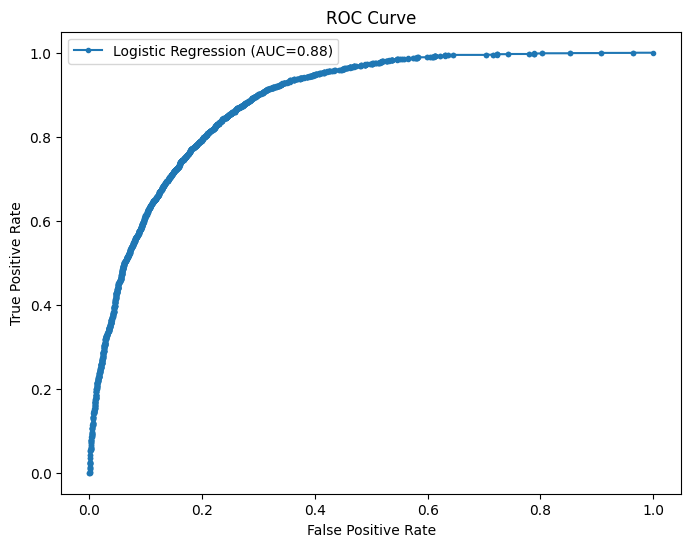

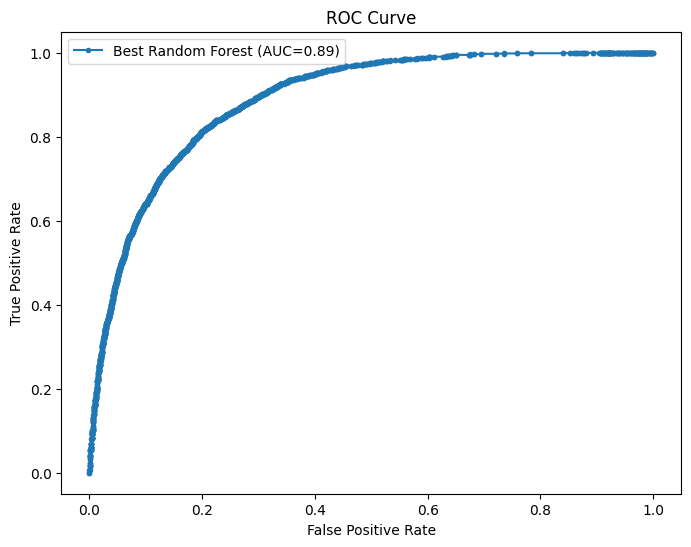

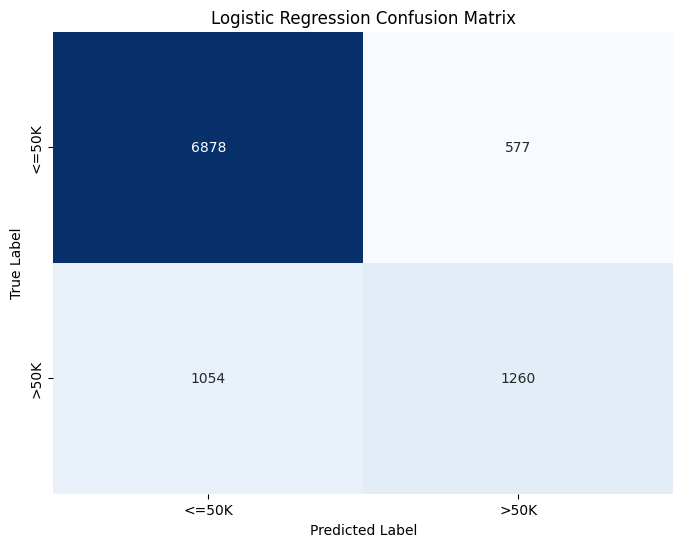

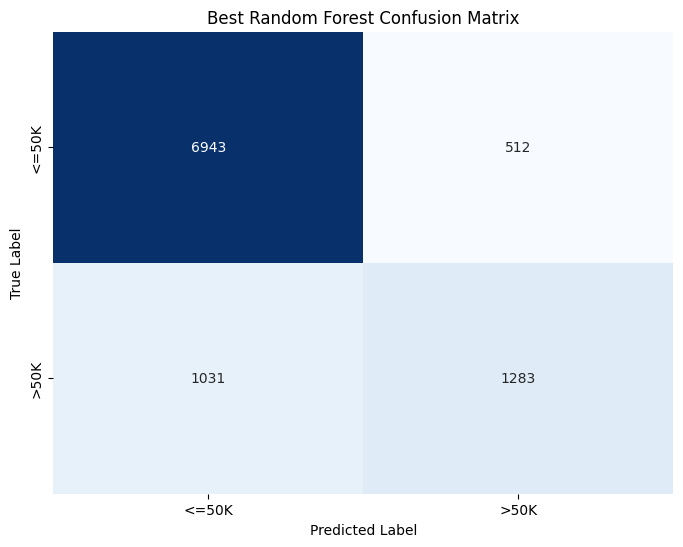

In [4]:
# # YOUR CODE HERE 

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# handle missing values:
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df['age'] = numerical_imputer.fit_transform(df[['age']])
df['hours-per-week'] = numerical_imputer.fit_transform(df[['hours-per-week']])
df['workclass'] = categorical_imputer.fit_transform(df[['workclass']])
df['occupation'] = categorical_imputer.fit_transform(df[['occupation']])
df['native-country'] = categorical_imputer.fit_transform(df[['native-country']])

# drop unnecessary columns:
df = df.drop(columns=['education', 'capital-loss', 'capital-gain'])

# one hot encoding categorical variables:
df_encoded = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country'])

# splitting data into training/testing sets:
X = df_encoded.drop('income_binary', axis=1)
y = df_encoded['income_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaling numerical features:
scaler = StandardScaler()
X_train[['age', 'hours-per-week']] = scaler.fit_transform(X_train[['age', 'hours-per-week']])
X_test[['age', 'hours-per-week']] = scaler.transform(X_test[['age', 'hours-per-week']])

# fitting models
log_reg = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier()

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# hyperparameter tuning for rf:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nBest Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))
print("\nBest Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))

# convert categorical y_test to numeric values:
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

# predict probabilities for ROC curve
y_scores_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_scores_rf_best = best_rf.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (AUC={roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# plot ROC curves:
plot_roc_curve(y_test_numeric, y_scores_log_reg, 'Logistic Regression')
plot_roc_curve(y_test_numeric, y_scores_rf_best, 'Best Random Forest')

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# plot confusion matrices:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf_best), title='Best Random Forest Confusion Matrix')